# Part I - Ford GoBike System Data Exploration
## by Adedamola Adedoyin

## Introduction
The Ford GoBike Dataset originally contains 183412 rows of data and 16 columns. Each row represents a ride made in a bike-sharing system around the San Francisco Bay area in the United State, for the month of February 2019. The `duration` column shows how long it takes a rider to go from one station (`start_station`) to another (`end_station`).

Some cleaning will be done to remove rows with missing data and some addition columns will be extracted from the existing ones to create features to aid better data exploration and analysis.


>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling
- Remove rows with nans
- Extract `weekday`, `month`, and `year` columns from the `start_time` column
- Calculate riders `member_age` columns from the riders' birth year column 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# Drop nans from the DataFrame
df= df.dropna()

# Convert the data types of the start_ and end_time columns to datetime
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

# Convert the user_type and member_gender to categorical (nominal/unordered) data types
cat_cols = ['user_type', 'member_gender', 'bike_share_for_all_trip']
for col in cat_cols:
    df[col]  = df[col].astype('category')

# Convert some float columns to int
int_cols = ['member_birth_year', 'start_station_id', 'end_station_id']
for col in int_cols:
    df[col]  = df[col].astype(int)
    
# Convert some int columns to objects
object_cols = ['bike_id', 'start_station_id', 'end_station_id']
for col in object_cols:
    df[col]  = df[col].astype(object)
    
    
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

In [5]:
df['start_hour'] = df['start_time'].dt.hour
df['end_hour'] = df['end_time'].dt.hour

df['start_weekday'] = df['start_time'].dt.day_name()

df['start_day'] = df['start_time'].dt.day

df['member_age'] = df['start_time'].dt.year - df['member_birth_year']

df['duration_min'] = round(df['duration_sec']/60, 1)

# Drop columns
drop_cols = ['duration_sec', 'member_birth_year',
             'start_station_latitude', 'start_station_longitude', 
             'end_station_latitude', 'end_station_longitude']
df_cut = df.drop(drop_cols, axis = 1)

ordered_col = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered_cat = pd.api.types.CategoricalDtype(categories = ordered_col, ordered=True)
df_cut['start_weekday'] = df_cut['start_weekday'].astype(ordered_cat)

df_cut.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   start_time               174952 non-null  datetime64[ns]
 1   end_time                 174952 non-null  datetime64[ns]
 2   start_station_id         174952 non-null  object        
 3   start_station_name       174952 non-null  object        
 4   end_station_id           174952 non-null  object        
 5   end_station_name         174952 non-null  object        
 6   bike_id                  174952 non-null  object        
 7   user_type                174952 non-null  category      
 8   member_gender            174952 non-null  category      
 9   bike_share_for_all_trip  174952 non-null  category      
 10  start_hour               174952 non-null  int64         
 11  end_hour                 174952 non-null  int64         
 12  start_weekday   

In [6]:
bike = df_cut.copy()

### What is the structure of your dataset?
For the dataset the timestamp columns are assumed to be in the local time for San Francisco, since no information was given on this. Also, the `bike_share_for_all_trip` column represents two categories members who are enrolled in a special dicount program for low-income areas.

After the preliminary wrangling, which included dropping rows with nans values, creating and dropping some columns, changing data types, etc., the following is the structure of the current `bike` (`df_cut`) dataset:

- A total of 174952 rows and 16 columns
- All data from February 2019
- There are 4607 unique Bike_id which corresponds to the different number of registered bikes
- There are 329 unique stations (each with a station name) as seen in `start_station_id` and `end_station_id` which corresponds to the different number of stations a ride started from and ended at.
- There are 2 unique user type/categories, namely; Customer and Subscriber
- There are 3 unique members' gender categories, namely; Male, Female, and Other 


### What is/are the main feature(s) of interest in your dataset?

The dataset will be further explored visually in  order to find valuable insights needed for analysis of the **main feature of interest**, Which is the ride duration (in minutes) i.e., `duration_min`. Other features of the dataset will be compared to this to see what features are most inflencial in determining ride duration.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Some of the features that will be explored in relation to the feature of interest include:
- Start and end hour of ride
- The day of the month
- Weekday
- User's membership type
- Member's Gender
- Members' ages
- Subscription to special program (bike share for all program)

Some of these features will also be compared again the others.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


In [32]:
bike.describe()

,start_hour,end_hour,start_day,member_age,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,13.456165,13.609533,15.312337,34.196865,11.733291
std,4.734282,4.748029,8.033926,10.118731,27.370031
min,0.000000,0.000000,1.000000,18.000000,1.000000
25%,9.000000,9.000000,8.000000,27.000000,5.400000
50%,14.000000,14.000000,15.000000,32.000000,8.500000
75%,17.000000,18.000000,22.000000,39.000000,13.200000
max,23.000000,23.000000,28.000000,141.000000,1409.100000


#### An overview of the distribution of numeric features

<Figure size 576x288 with 0 Axes>

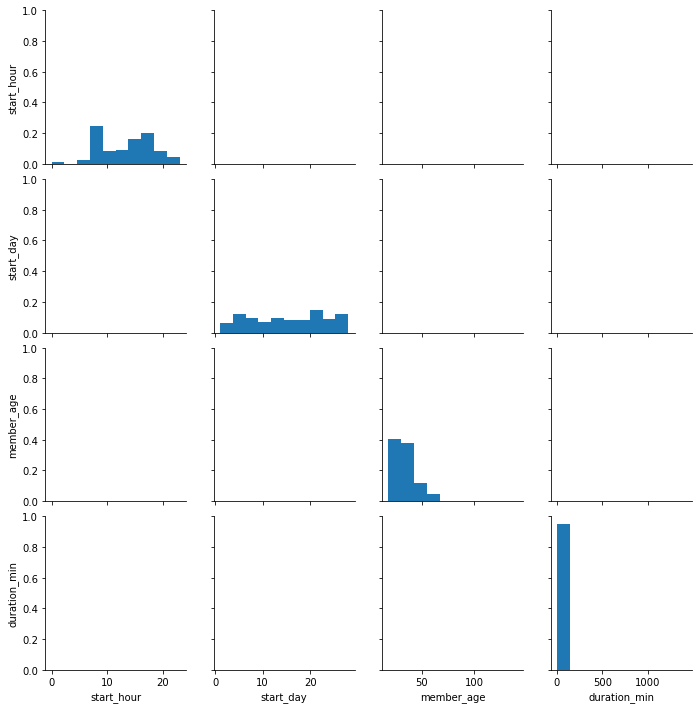

In [8]:
plt.figure(figsize = (8,4))

g=sb.PairGrid(data = bike[['start_hour', 'start_day', 'member_age', 'duration_min']]);
g.map_diag(plt.hist);


#### What is the distribution of the main feature of interest?

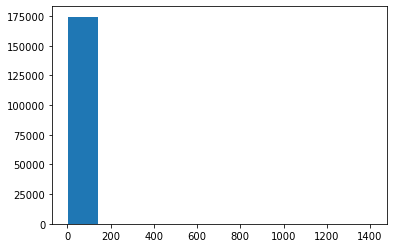

In [9]:
plt.hist(data = bike, x  = 'duration_min');

In [10]:
# Remove entries with extreme value of duration
outlier_mask = bike['duration_min'].quantile(0.99)

bike_cut = bike[bike['duration_min'] <= outlier_mask]

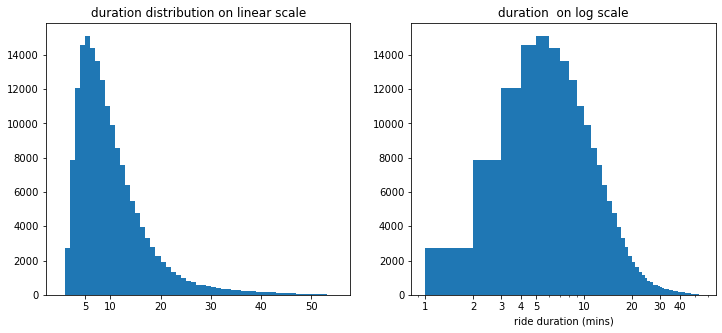

In [11]:
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1))
plt.xticks([5,10,20,30,40,50], [5,10,20,30,40,50])
plt.title('duration distribution on linear scale');

plt.subplot(122)
plt.hist(data = bike_cut, x  = 'duration_min', bins = range(0,56,1), )
plt.xscale('log')
plt.xticks([1,2,3,4,5,10,20,30,40], [1,2,3,4,5,10,20,30,40])
plt.title('duration  on log scale')
plt.xlabel('ride duration (mins)');


The maximum duration frequency appears to be around rides lasting for about 4mins to about 7 mins, and the median duration lies within this range.  The data appears to be significantly right-skewed 

#### Start and End Hours Distribution

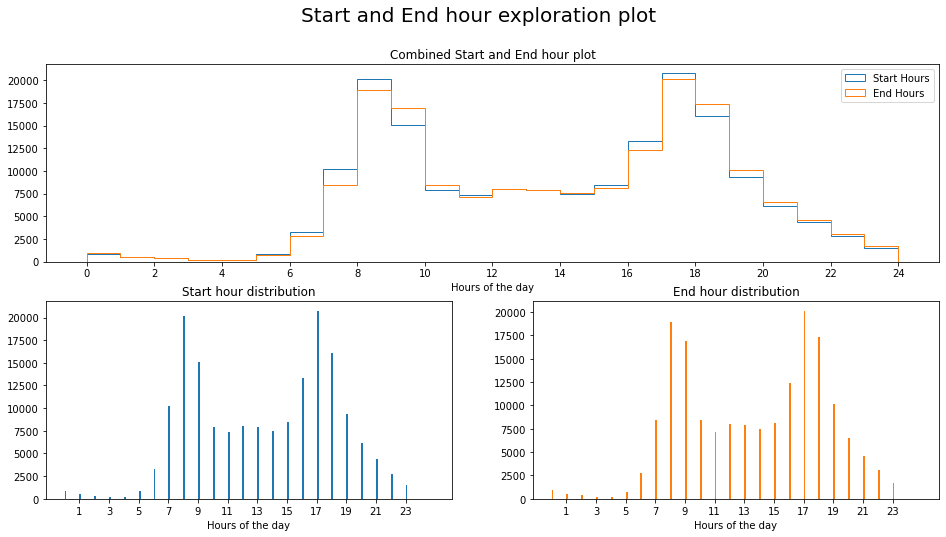

In [12]:
plt.figure(figsize = (16,8))
plt.suptitle("Start and End hour exploration plot", fontsize = 20)

plt.subplot(2,2,(1,2))
plt.hist(bike_cut['start_hour'], bins=np.arange(0,25,1), histtype = 'step', label='Start Hours')
plt.xticks(range(0,25,2))
plt.xlabel('Hours of the day')

plt.hist(bike_cut['end_hour'], bins=np.arange(0,25,1), histtype = 'step', label='End Hours')
plt.xticks(range(0,25,2))
plt.xlabel('Hours of the day')

plt.legend()
plt.title('Combined Start and End hour plot');



plt.subplot(223, title = 'Start hour distribution', xticks = range(1,25,2), xlabel = 'Hours of the day')
plt.hist(bike_cut['start_hour'], bins=np.arange(0,25,0.125))

plt.subplot(224,   title = 'End hour distribution', xticks = range(1,25,2), xlabel = 'Hours of the day')
plt.hist(bike_cut['end_hour'], bins=np.arange(0,25,0.125), color=sb.color_palette()[1]);

The above plot shows a unimodal distribution of the hours of the day that a ride starts (in blue) and ends (in orange). Understandably, the two peak periods are in the morning between the hours of 8am to 9am as members commute to work, and then in the evening, after work, between the hours of 5pm to 6pm.

#### Distribution across the 28 days of February

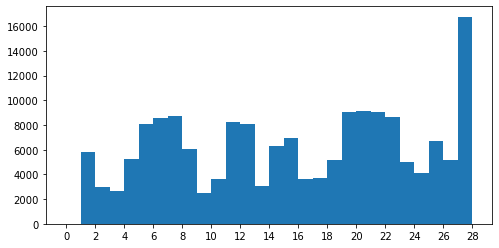

In [13]:
plt.figure(figsize = (8,4))

plt.hist(bike_cut['start_day'], bins=range(0,29,1))
plt.xticks(range(0,29,2));

The distribution for the ride data all through the month shows a few deeps, suspected to be the no work days where people tend to commute less (This will be confirmed in the next plot). The peak is seen at the final day of the month.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

#### What day of the week had the most and least rides

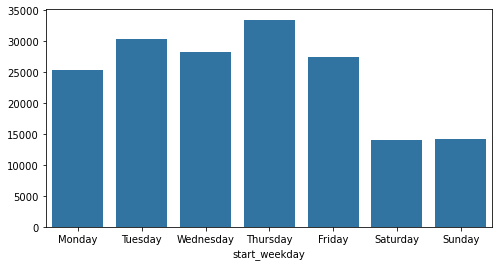

In [14]:
Weekday_group = bike_cut.groupby('start_weekday').count()['bike_id']

plt.figure(figsize = (8,4))
base_color = sb.color_palette()[0]
sb.barplot(x = Weekday_group.index, y = Weekday_group.values, color = base_color);

As suspected, Saturday and Sunday (Weekend) both have the least count of rides for the given dataset. This is most likely bacause fewer people go to work on both days compared to the other days. Nevertheless, this might not be the only reason, other factor might be contributing to this obvious difference in ride count. Although a little more than the others, Thursday had the most recorded rides or the 7 weekdays for February 2019.

#### What are the membership types and how are they distributed?

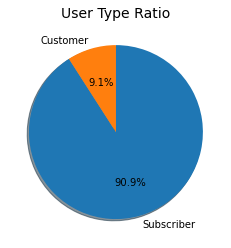

In [15]:
member_type = bike_cut['user_type'].value_counts()

sizes = member_type.values
labels = member_type.index

fig1, ax1 = plt.subplots()
ax1.pie(sizes,autopct='%1.1f%%', shadow=True, labels = labels, startangle=90, counterclock = False)
plt.title('User Type Ratio', fontsize = 14);

#### Check Gender distribution 

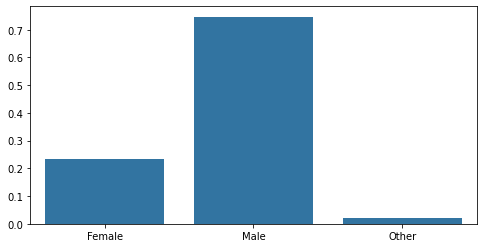

In [16]:
gender_group = bike_cut['member_gender'].value_counts(normalize = True)

plt.figure(figsize = (8,4))
sb.barplot(x = gender_group.index, y = gender_group.values, color = base_color);

From the above plot, the percentage of male riders and female riders were seen to be about 75% to 23% respectively (coresponding to a ratio of 3:1), leaving the percentage of other gender types at about 2%.

In [30]:
# Ratio of users that subscibed to the Bike-Share-For-All program. 
bike_cut['bike_share_for_all_trip'].value_counts(normalize = True)


No     0.901492
Yes    0.098508
Name: bike_share_for_all_trip, dtype: float64

The above shows that about 90% of member are not subscribed to the program while only about 10% actually subscribed.

#### Inspecting the distribution of members ages

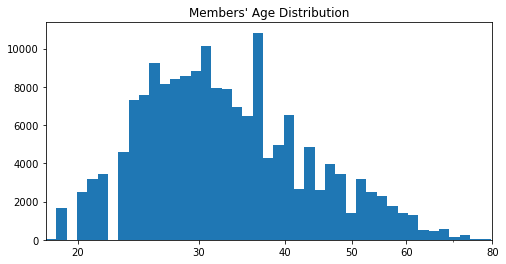

In [18]:
plt.figure(figsize = (8,4))

x_ticks = [ 20, 30, 40, 50, 60,80,100]
min_ = np.log10(bike_cut['member_age']).min()
max_ = np.log10(bike_cut['member_age']).max()
bin_size = 10**np.arange(min_, max_+0.015, 0.015)
plt.hist(bike_cut['member_age'], bins  = bin_size)
plt.xscale('log')
plt.xticks(x_ticks, x_ticks)
plt.xlim(18, 80)
plt.title('Members\' Age Distribution');

The above age distribution shows a fair (close to normal distribution) with a slight right skew.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The duration distribution shows a significant outlier at the upper end, with median at about 5mins and highest value  at about 1500mins. After dropping this outlier, the distribution plotted on a log scale showed that the maximum duration frequency appeared  to be around rides lasting for about 4mins to about 7 mins, and the median duration lies within this range. Even with on log scale, the data still appeared to be skewed towards the right.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

Of the features explored the follow were worth of noting:
- Start and end hour of ride: There is a close similarity between both of these features as the plot appeared to overlap at several points for an hour (1hr) bin size. This must be due to the fact that 3/4 of the entire distribution is below 14mins in duration, a much smaller bin size of about 0.125hr (7.5mins) shows the distribution.

- The day of the month: The distribution for the ride data all through the month shows a few deeps, suspected to be the no work days where people tend to commute less. The peak is seen at the final day of the month.

- Weekday: As suspected, Saturday and Sunday (Weekend) both have the least count of rides for the given dataset. This is most likely bacause fewer people go to work on both days compared to the other days. Nevertheless, this might not be the only reason, other factor might be contributing to this obvious difference in ride count. Although a little more than the others, Thursday had the most recorded rides or the 7 weekdays for February 2019.

- Member's Gender: The percentage of male riders and female riders were seen to be about 75% to 23% respectively (coresponding to a ratio of 3:1), leaving the percentage of other gender types at about 2%.

- Members' ages: The age distribution shows a fair (close to normal distribution) with a slight right skew on the log scale.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

#### Duration distribution across each day of the week.

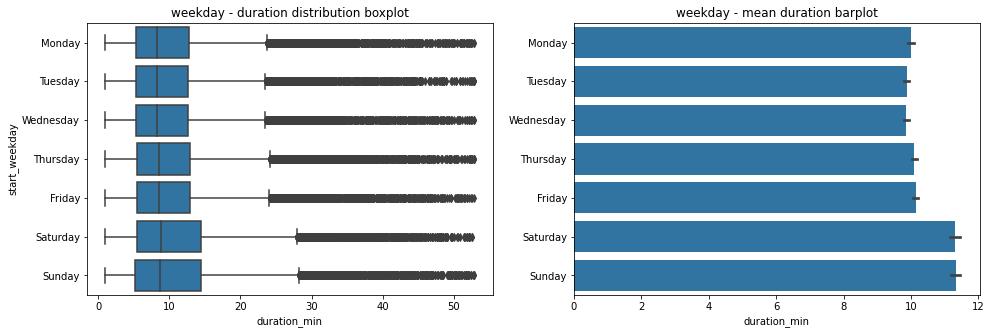

In [19]:
plt.rcParams['figure.figsize'] = 16,5

plt.subplot(121, title = 'weekday - duration distribution boxplot')
sb.boxplot(data = bike_cut, y = 'start_weekday', x = 'duration_min', color = base_color);

plt.subplot(122, title = 'weekday - mean duration barplot' )
sb.barplot(data = bike_cut, y = 'start_weekday', x = 'duration_min', color = base_color)
plt.ylabel('');

The boxplot shows a relatively constant median duration across each weekday (Monday to Friday). A slightly higher median and 75th percentile for Saturday and Sunday. For the mean, the Saturday and Sunday also has a higher mean compared to the 5 other days, although the number of rides for both days is much smaller compared to other days as seen in the univariate distribution plot for weekdays.

#### Daily (1st to 28th) ride duration for the month of February 2019

In [31]:

daily_duration=bike_cut.groupby(['start_day', 'start_weekday']).agg({'duration_min':[np.mean, np.median, np.min, np.max]}).dropna()
# print(daily_duration.columns)
# print(daily_duration.columns[0])
# print(daily_duration.index)
day_index = daily_duration.index.to_frame()['start_day'].values
weekday_index = daily_duration.index.to_frame()['start_weekday'].values

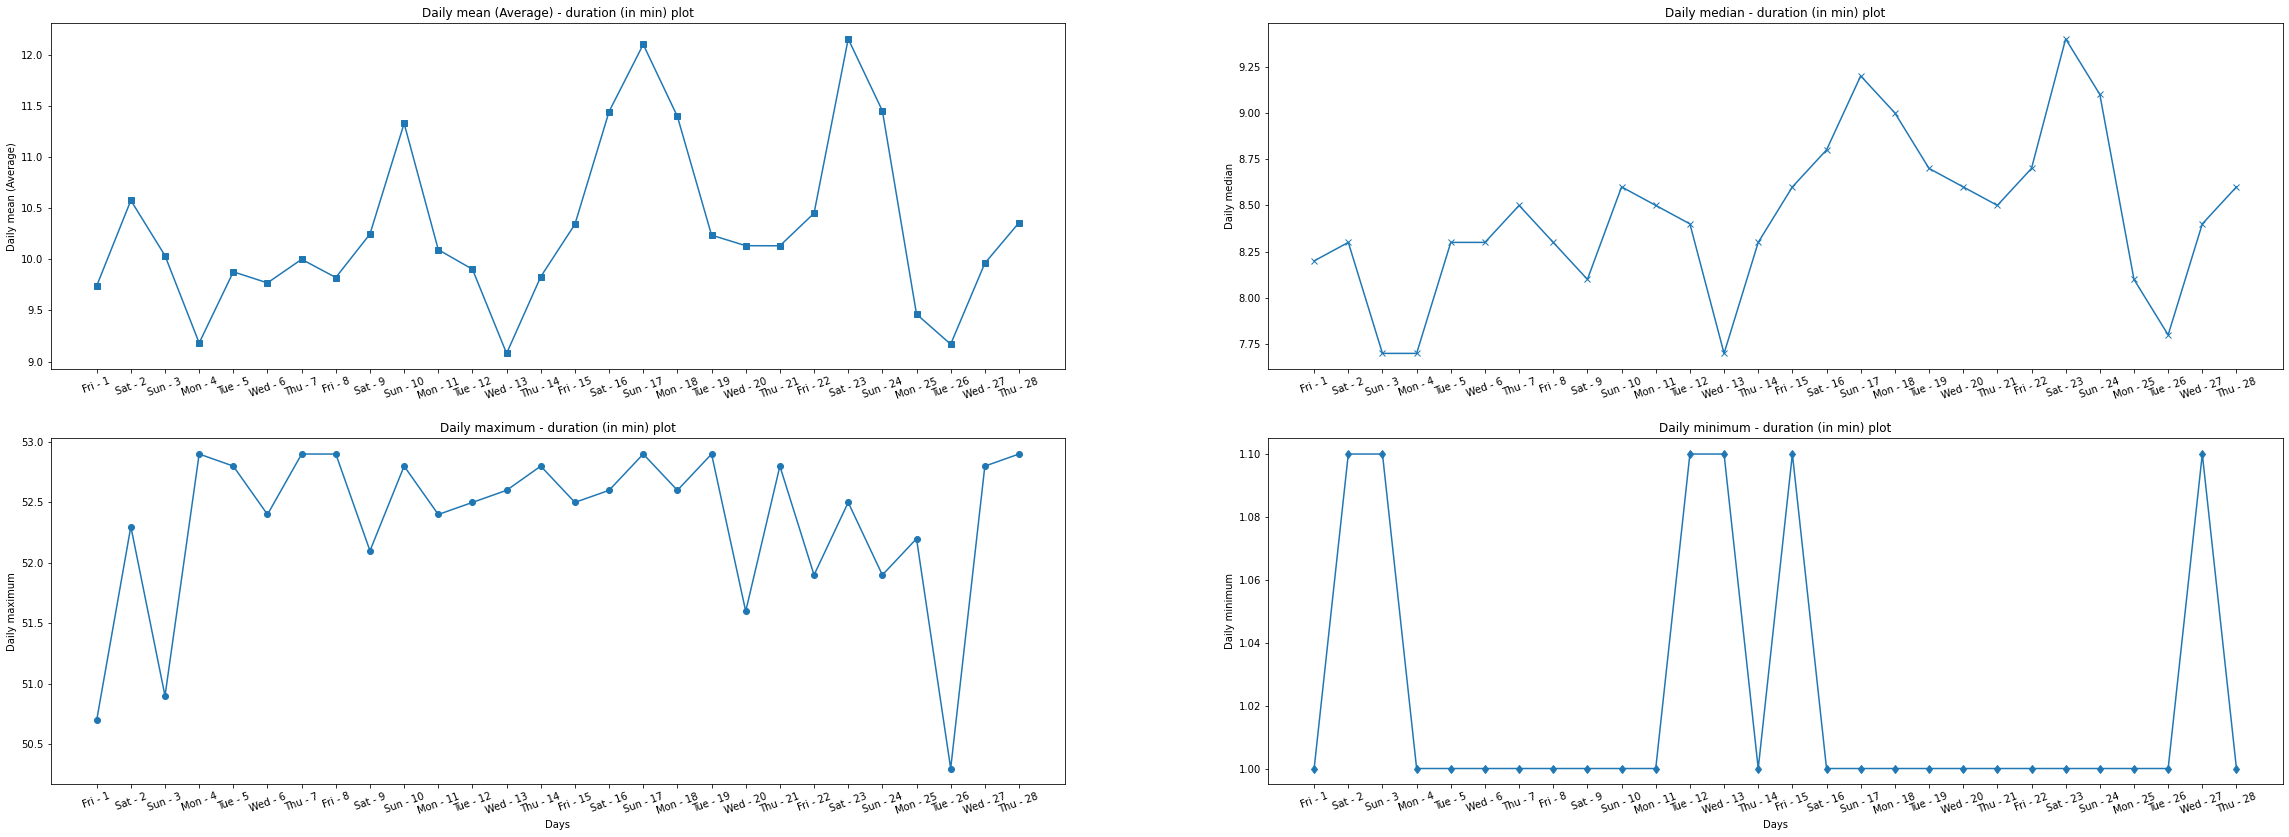

In [21]:
plt.rcParams['figure.figsize'] = 40,14

def daily_duration_plot(plot_position, plot_type, measure, marker):
    plt.subplot(plot_position, title = f'Daily {plot_type} - duration (in min) plot')
    plt.plot(day_index, daily_duration[('duration_min', measure)], marker=marker)
    plt.xlabel('Days')
    plt.ylabel(f'Daily {plot_type}')
    plt.xticks(day_index, [f'{wk[:3]} - {d}' for (wk,d) in zip(weekday_index, day_index)], rotation = 20);
    
daily_duration_plot(221, 'mean (Average)', 'mean', 's')     
plt.xlabel('')

daily_duration_plot(222, 'median', 'median', 'x')    
plt.xlabel('')

daily_duration_plot(223, 'maximum', 'amax', 'o')
daily_duration_plot(224, 'minimum', 'amin', 'd')

From the plots showing the daily average, median, minimim and maximum ride duration, we can further drilldown into each day to have a look at the duration stats for each day of February 2019, and if there is anything to observe with the day of the week (Mon, Tue, Wed,... Sun)

#### Ride duration for each ride start-hour

In [22]:
hourly_duration=bike_cut.groupby('start_hour').agg({'duration_min':[np.mean, np.median, np.min, np.max]})
hourly_duration['duration_min'][['mean', 'median']]

,mean,median
start_hour,,
0,9.033982,6.80
1,9.784778,7.10
2,10.401739,8.10
3,9.571795,7.45
4,9.874107,6.60
5,9.250350,7.90
6,8.554240,7.30
7,9.456876,8.30
8,10.153117,9.00


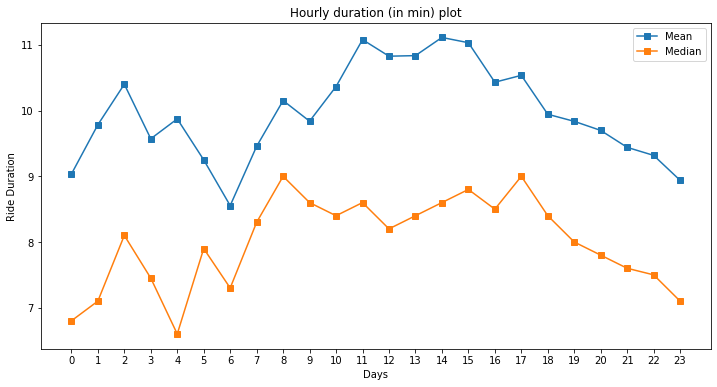

In [23]:
plt.rcParams['figure.figsize'] = 12,6

def hourly_duration_plot(measure, marker, plot_label):
    plt.plot(hourly_duration.index, hourly_duration['duration_min'][measure], marker=marker, label= plot_label)
    plt.xticks(range(0,24,1))
    plt.xlabel('Days')
    plt.ylabel('Ride Duration')
    plt.legend()
    
hourly_duration_plot(measure = ['mean', 'median'], marker = 's', plot_label = ['Mean','Median'])
plt.title('Hourly duration (in min) plot');


The mean and median ride duration for each start ride hour are shown in the chat above. The two plots show a very similar trend. The highest mean ride duration appears to be for ride starting around 11am to 3pm. A steady decline in mean ride duration is seen after the 15th hour.

#### Ride duration's variation with members' ages

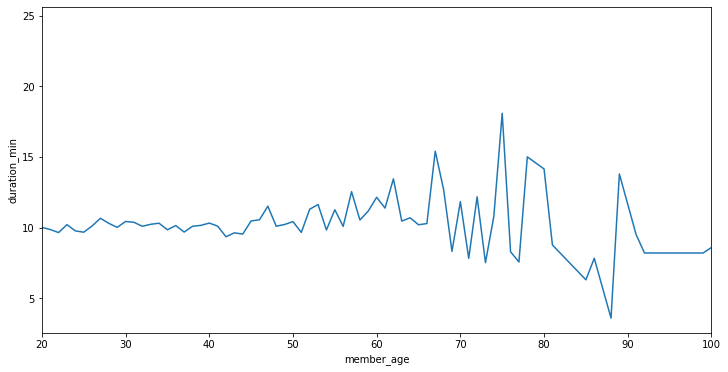

In [29]:
sb.lineplot(data = bike_cut, x = 'member_age', y = 'duration_min', ci = None)
plt.xlim((20,100));

For all rides from start to end station, there looks to be a steady duration of 10 to 11 mins for members aged between 20 to 40 years. From 40 yrs and above (the last 75th to 99th percentile), the variation in ride duration increases significantly.

#### Members Gender's relationship with ride duration 

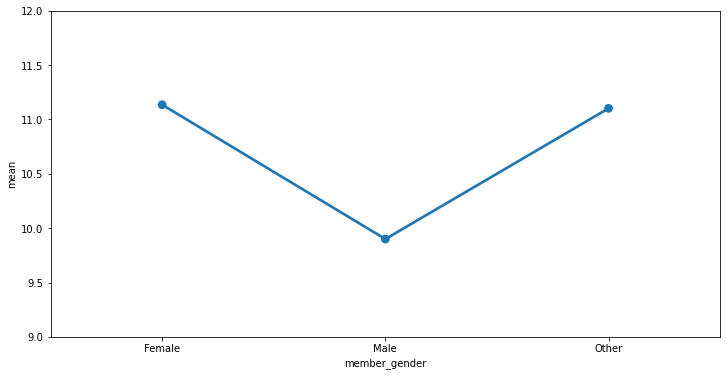

In [61]:
gender_duration = bike_cut.groupby('member_gender')['duration_min'].agg(['count', 'mean'])

sb.pointplot(y = gender_duration['mean'], x = gender_duration.index)
plt.ylim(9,12);

The pointplot shows that on average, male subscribers typically have a lesser ride duration than female and other gender subscribers. However, it should be noted that 75% of members in dataset are male while only about 23% are female.

#### Ride duration's dependency on membership type 

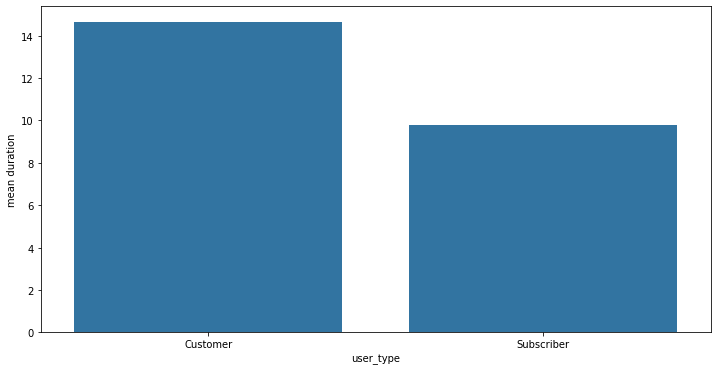

In [78]:
user_duration = bike_cut.groupby('user_type')['duration_min'].agg(['count', 'mean'])

sb.barplot(y = user_duration['mean'], x = user_duration.index, color=base_color)
plt.ylabel('mean duration');

From the barplot, the customer (about 10% of members) have a higher mean ride duration than the subscribers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

